### What we are going to cover 
- getting the data ready 
- choosing the right estimator/algorithm for the problem 
- fit the model/algorithm and use it to make predictions on our data 
- evaluating the model 
- improving the model 
- saving and loading a trained model 

In [3]:
# 1. Get the data ready 
import pandas as pd 
import numpy as np 
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [5]:
# 2. Choose the right model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# make a prediction 
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [9]:
# 4 evaluate the model on the training data and test data 
clf.score(X_train,y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.819672131147541

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.84      0.86      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[18,  6],
       [ 5, 32]])

In [13]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [14]:
# 5 improve the model 
# try a diffrent amount of n_estimators

np.random.seed(42)
for i in range (10, 100, 10):
    print(f'trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}')
    print("")


trying model with 10 estimators...
Model accuracy on test set: 81.97

trying model with 20 estimators...
Model accuracy on test set: 85.25

trying model with 30 estimators...
Model accuracy on test set: 80.33

trying model with 40 estimators...
Model accuracy on test set: 78.69

trying model with 50 estimators...
Model accuracy on test set: 78.69

trying model with 60 estimators...
Model accuracy on test set: 78.69

trying model with 70 estimators...
Model accuracy on test set: 83.61

trying model with 80 estimators...
Model accuracy on test set: 80.33

trying model with 90 estimators...
Model accuracy on test set: 77.05



In [15]:
# Save the model and load it 

import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [16]:
# Load the model 

loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.7704918032786885

In [17]:
import matplotlib.pyplot as plt 

###  1 . Getting data ready to be used with machine learning 

3 main things to do 
1. Split the data into features and labels (usually X and y)
2. Filling (also called imputing) or disregarding missing values 
3. Converting non-numerical values to numerical values (feature encoding)

In [18]:
X = heart_disease.drop('target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Split the data into training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [22]:
### Making sure the data is numerical 
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
# Split into X/y

X = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [24]:
# Build ML Model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

#Turn the categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [25]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [26]:
dummies = pd.get_dummies(car_sales[['Make','Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [27]:
# Refit the model 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2 What if there are missing values?
1. Fill them with some value (imputation)
2. Remove the samples with missign data altogether

In [29]:
# import car sales missing data 
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [30]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [31]:
# Create X and Y 
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing['Price']

In [32]:
# try and convert data to nums 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [33]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [34]:
# Fill the 'Make' column 
car_sales_missing['Make'].fillna('missing', inplace = True)

# Fill the 'Colour' column 
car_sales_missing['Colour'].fillna('missing', inplace= True)

# Fill the Odometer column 
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)

# Fill the 'Doors' column 
car_sales_missing['Doors'].fillna(4, inplace= True)

C:\Users\usman\AppData\Local\Temp\ipykernel_12740\3350696958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna('missing', inplace = True)
C:\Users\usman\AppData\Local\Temp\ipykernel_12740\3350696958.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [35]:
# Check df again 
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
# Remove rows with missing price values 
car_sales_missing.dropna(inplace = True)

In [37]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [38]:
len(car_sales_missing)

950

In [39]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [40]:
# try and convert data to nums 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

### Option 2: Fill missing values with scikir-learn

In [41]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# Drop the rows with no labels 
car_sales_missing.dropna(subset = ['Price'], inplace= True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [44]:
# Split into X and y
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

# Split data into train and test 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# Check missing values 
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [46]:
# Fill missing values with Scikit-Learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean 
cat_imputer = SimpleImputer(strategy='constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant', fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

# Define columns 
cat_features = ['Make','Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer 
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately 
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], shape=(760, 4), dtype=object)

In [47]:
# Get our transformed data array's back into dfs
car_sales_filled_train = pd.DataFrame(filled_X_train, columns=['Make','Colour','Doors','Odometer (KM)'])

car_sales_filled_test = pd.DataFrame(filled_X_test, columns= ['Make','Colour', 'Doors', 'Odometer (KM)'])

# Check missing data in training set 
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [48]:
# Check to see the original.... still missing values 
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# Now lets one hot encode the features with the saeme code as before 
categorical_features = ['Make', "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

# Fill train and test values separately 
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test  = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train 
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]], shape=(760, 15))

In [50]:
# Now we have transformed X, lets see if we can fit a model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

In [51]:
# check the length of transformed data vs length of original data 
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

## 2. Choosing the restimator/algorithm for your problem 

### 2.1 Picking an ML model for a regression problem
Let's use the California Housing dataset

In [52]:
# Get California HOusing dataset 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [53]:
housing_df = pd.DataFrame(housing['data'], columns = housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [54]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
#Import algorithm/estimator 
from sklearn.linear_model import Ridge 

# setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop('target', axis = 1)
y = housing_df['target']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Instantiate and fit the model 
model = Ridge()
model.fit(X_train, y_train)

# Check the scored of the model 
model.score(X_test, y_test)


0.5758549611440127

* Ridge - linear least squares with L2 Regularization 
* This model solves a refression model where the loss function is the linear least squares function and regularization is given by the L2-norm
    * regularization is a technique used to prevent overfitting in ML models by adding a penalty term to the loss function which reduced the magnitude of the model's coefs. 

What if Ridge did not work or the score did not fit our needs?

the goal is to try a different model 

How about we try an ensemble model - a combo of smaller models to try and make better predictions than just a single model 

In [56]:
# Import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

# Setup the random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop('target', axis = 1)
y = housing_df['target']

# split into train and test sets 
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size= 0.2)

# Create the model 
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Score the model 
model.score(X_test, y_test)

0.8065734772187598

* RandomForestRegressor is an ensemble learning method
* it utilizes the bagging technique (bootstrap technique) to build indiviudla models 
    * bootstrap sampling - randomly selecting subsets of the training data with replacement to train each individual decision tree 
    * feature sampling - randomly selecting a subset of features to be considered for splitting at each node of each tree 
            * this further decorrelates the trees and prevents them from relying too heavily on any single feature

Key Concepts:
* reduces overfitting by averaging the predictions from multiple decision trees 
* handles non-linearity 
* robust to outliers - the aggregation process makes the random forest less sensitive to outliers 
* RandomForestRegressor can provide estimates of feature importance 
* random forests can work effectively even with some missing data 

In summary RandomForestRegressor combines the strenths of indiviudal decision trees with the power of ensemble learning to provide accurate, stable, and robust predictions for regression tasks

### 2.2 Choosing an estimator for a classification problem 

In [57]:
# Get the data 
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
len(heart_disease)

303

In [59]:
# After consulting the map it sats try LinearSVC

# Import LinearSVC estimator class 
from sklearn.svm import LinearSVC

# setup random seed 
np.random.seed(42)

# Make the data 
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# INstantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Score the model 
clf.score(X_test, y_test)

0.8688524590163934

## 3. Fit the model/algo on the data and use it to make predictions 

### 3.1 Fitting the model to the data
* X = features, feature variables, data 
* y = labels, targets, target variables

In [60]:
# Import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed 
np.random.seed(42)

# Create the data 
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# split into train and test sets 
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size= 0.2)

# Create the model 
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Score the model 
clf.score(X_test, y_test)

0.8524590163934426

In [61]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [62]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Making predictions using an ML model 
2 ways to make predictions: 
1. `predict()`
2. `predict_proba()`

### Making predictions using a classification model 

In [63]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [64]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [65]:
# compare predictions to truth labels to evaluate model 
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [66]:
clf.score(X_test,y_test)

0.8524590163934426

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

making predictions with `predict_proba()` - use then to answer "what is the probability your model is assigning to each prediction"

In [68]:
# predict_proba() returns the probabilities of a classification label 
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [69]:
# predict() on the same data 
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### predict() on regression models 

In [70]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data 
X = housing_df.drop('target', axis = 1)
y = housing_df.target

# train/test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# create model instance
model = RandomForestRegressor()

# fit the model to the data 
model.fit(X_train, y_train)

# make predictions 
y_preds = model.predict(X_test)

In [71]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [72]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [73]:
# compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

## 4. Evaluating an ML model 
3 ways to evaluate scikit-learn models/estimators:
1. Estimator's built in `score()` method 
2. the `scoring` parameter 
3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [75]:
# the highest value for the .score() method is 1.0 - lowest is 0.0
clf.score(X_train, y_train)

1.0

In [76]:
clf.score(X_test, y_test)

0.8688524590163934

Using the score() method on the regression problem 

In [77]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
# The default score() evaluation metric is r_squared for regression algorithms 
# the r^2 vlaue is defined as a number that tells you how well the independent variable in a model explains the variation in the dependent variable
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using the `scoring` parameter 

In [79]:
from  sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
clf.score(X_test, y_test)

0.8524590163934426

In [81]:
cross_val_score(clf, X, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [82]:
cross_val_score(clf, X, y , cv =10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [83]:
np.random.seed(42)

# single trainig and test split score 
clf_single_score = clf.score(X_test, y_test)

# taking the mean of 5-fold cv score 
clf_cv_score = np.mean(cross_val_score(clf, X, y, cv = 5))

# Compare the tow 
clf_single_score, clf_cv_score

(0.8524590163934426, np.float64(0.8248087431693989))

Even though the cv metric is lower you want to use the cv metric 
the scoring parameter is set to None by default - you can pass a different scoring function 
cv aims to solve on not training on all the data and avoid getting lucky scores - as the single split score got a higher score than the cv score

### 4.2.1 Classification model evaluation metrics 
1. Accuracy 
2. Area under ROC curve
3. Confusion matric
4. Classification report 

**Accuracy**

In [84]:
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()
cv_score = cross_val_score(clf, X, y, cv = 5)

In [85]:
np.mean(cv_score)

np.float64(0.8248087431693989)

In [86]:
print(f'Heart Disease Classifier Accuracy: {np.mean(cv_score)*100:.2f}%')

Heart Disease Classifier Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

- Area under curve (AUC)
- ROC Curve 

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)
-True positive = model predicts 1 when truth is 1
- False positive = model predicts 1 when truth is 0
- True negative = model predicts 0 when truth is 0 
- False negative = model predicts 0 when truth 1 

In [87]:
# train/test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [88]:
from sklearn.metrics import roc_curve

# fit the classifier 
clf.fit(X_train, y_train)

# Make predictions with probabilities 
y_probs = clf.predict_proba(X_test)


y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

Above I am printing the first 10 rows of the predicted probabilities 

- When evaluating a model using ROC curves, you typically use `y_probs[:, 1]` which is the probabilitiesfor the positive class

In [89]:
y_probs_positive = y_probs[:,1] # probability of predicting a positive class
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [90]:
# Calculate fpr, tpr and threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

# Check false positive rates 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

- the array above displays the fpr at each threshold from 1.0 down to 0.0 
- it starts at 0: no false positives 
- it increases to as the threshold for classiying a sample as 'positive' becomes more lenient 

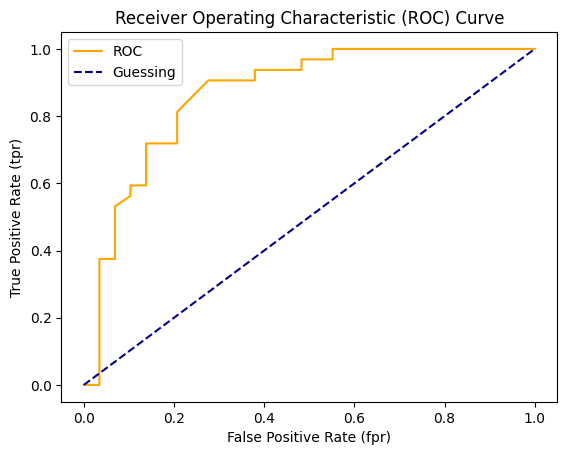

In [91]:
# create function for plotting ROC curves 

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the flase positive rate (fpr)
    and true positive rate (tpr) of a model 
    """

    # plot roc curve 
    plt.plot(fpr, tpr, color = 'orange', label = "ROC")
    # plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing' )

    # Customize the plot 
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


The orange line is the model's ROC Cirve 
- this line shows the model's tpr and fpr change as you **adjust the classification threshold**
- it starts at the bottom left where the threshold is 1.0: everything is classified as negative 
- it ends at the top right where the threshold is 0.0: everything is classified as positive

The dashed line is random guessing - which is a 50/50 chance
- any model performing below this line is worse than random 

How thresholds come into play:
- the model outputs probabilities, not binary labels directly
- you apply a threshold to decide how to turn those probabilities into a final class label 

- for each threshold value, the model predicts
    - positive if prob>= threshold 
    - negative otherwise 

What you want:
- the curve to hug the top left corner (high tpr, low fpr)

In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

np.float64(0.8669181034482759)

you can compute the AUC (Area under Curve) - higher AUC means better performance 

The AUC represents the probability the classifier will rank a randomly chosen positive instance higher than a randomly chosen negatice instance 

It is a single scalar value summartize the model's perforamnce across all p;ossibile threshold 

Why AUC is useful:
- it does not depend on a specific threshold, so it gives a more complete view of model performance 
- it is especially useful when the dataset is imbalanced and/or you care about ranking predictions rather than hard classifications

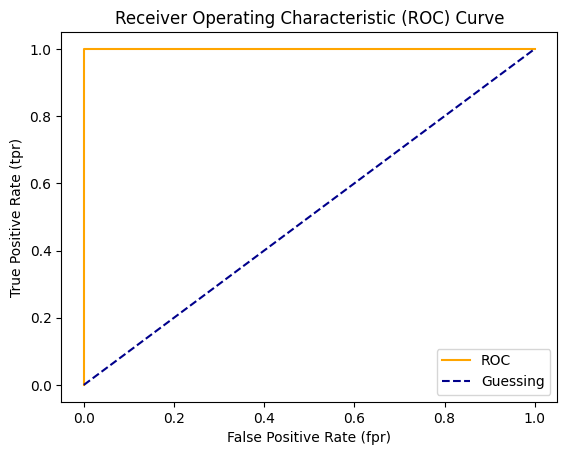

In [93]:
# PLot perfect ROC curve and AUC score 
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

* ROC curves and AUC metrics are evaluation metrics for binary classification models
* The ROC curve compares the true positive rate (tpr) vs the false positive rate (fpr) at different classification threshold 
* The AUC metric tells you how well your model is at choosing between classes. A perfect model get an AUC score of 1 

**Confusion Matrix**

A quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, givign you and idea of where the model is getting confised

In [94]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [95]:
# Visualize the confuision matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Label'])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


<Axes: >

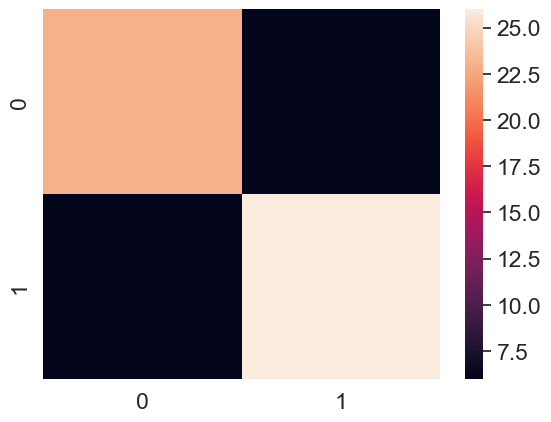

In [96]:
# Make our confusion matrix more visual with seaborn heatmap()
import seaborn as sns 

# Set the font scale 
sns.set(font_scale = 1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)

# Plot 
sns.heatmap(conf_mat)

** Confusion Matrix **

A confusion matric is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essense, this gives you an idea of wehere the model is getting confused

In [97]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [98]:
pd.crosstab(
    y_test, y_preds,
    rownames = ['Actual Label'],
    colnames = ['Predicted Label']
)

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


#### Creating a confusion matrix using scikit-learn 

In [99]:
from sklearn import __version__
print(f'scikit-learn version: {__version__}')

scikit-learn version: 1.6.1


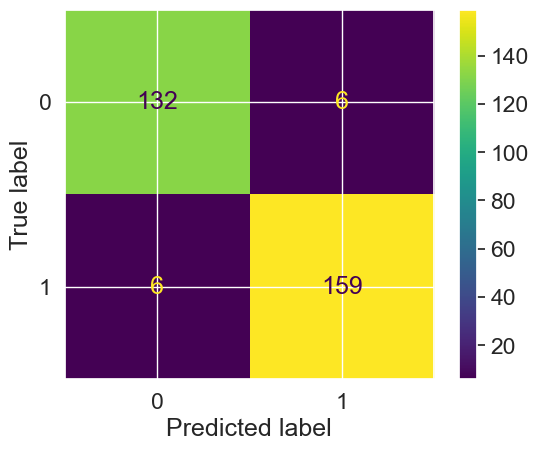

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

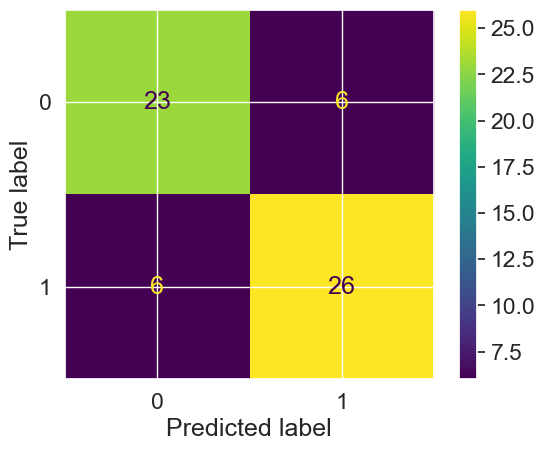

In [101]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

** Classification Report **

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



**Precision** - indicates the proportion of positive identifications which were actually correct

**Recall** - indicates the proportion of actual positives which were correctly classified 

**F1 score** - a combination of precision and recall 

**Support** - the number of samples each metric was calculated on 

**Accuracy** the accuracy of the model in decimal form 

**Macro avg** - the average precision, recall and F1 score between classes. If you have class imbalances pay attention to this metric 

**Weighted avg** - the weighted average precision, recall and F1 score between classes  

In [103]:
# Where precision and recall become valuable 
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds, output_dict=True))

c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Model Evaluation Regression Metrics 
1. R^2 or coefficient of determination
2. Mean Absolute Error
3. Mean Squared Error 

**R^2**
What R-Squared does: 

Compares yout models predictions to the mean of the targets. Values can range from negative infinity (poort model) to 1

For example, if all you model does is predict the mean of the targets, it's R^2 value be 0. And if your model perfectly predicts a range of numbers its R^2 value would be 1.

In [104]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis = 1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [105]:
model.score(X_test, y_test)

0.8065734772187598

In [106]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean 
y_test_mean = np.full(len(y_test), y_test.mean())


In [107]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [108]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [109]:
r2_score(y_true=y_test, y_pred = y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and values 

It gives you an idea of how wrong your model's predictions are

In [110]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)

mae

0.32659871732073664

In [115]:
df = pd.DataFrame( data = {"actual values" :y_test,
                           "predicted values": y_preds})
df['differences'] = abs(df['predicted values'] - df['actual values'])
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,0.925110
5723,4.46600,4.834478,0.368478


In [117]:
df['differences'].mean()

np.float64(0.32659871732073664)

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [118]:
#MSE 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [119]:
df['squared differences'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,0.448240,0.200919


In [120]:
squared = np.square(df['differences'])
squared.mean()

np.float64(0.2534678520824551)

**Which regression metric should you use?**
- R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is 1.0 - the better the model. But it does not really tell exactly how wrong your model is in terms of how far each prediction is. 
- MAE gives a better indication of how far off each of your model's predictions are on average 
- As for MAE or MSE - because the way MSE is calculated, it amplifies the larger differences

# ML Model Evaluation Review 

**Classification Model Evaluation Techniques**
- Accuracy: the accueracy of the model in decimal form. Perfect accuracy is equal to 1.0. Calculated by dividing number of correct predictions by total number of predictions

- Recall: indicates the proportion of actual positives that were correctly classified. A model which produces no false negatives has a recall of 1.0 

- F1 Score: harmonic mean of precision and recall. A perfect model achieves an F1 score of 1.0

- Confusion Matric: compares the predicted values with the true values in a tabular way

- Cross-Validation: splits your dataset into multiple parts and trains and tests your model on each part then evaluates performance as an average

- Classification Report: Sklearn has a built in function `classification_report()` which returns some of the main classification metrics such as precision, recall, f1 score.

- ROC cruve: also known as receiver operating characteristic is a plot of true positive rate vs. false positive rate 

- Area under Curve (AUC) Score: the area underneath the ROC curve. A perfect model achieves an AUC score of 1.0

<u>Which classification metric should you use?</u>
- Accuracy is a good measure to start with if all classes are balances 

- Precision and recall become more important when classes are imbalances
    - aim for precision if you want to minimize false-positives
    - aim for recall if you want to minimimize false-negatives 

- F1 Score is a combination of precision and recall 

- A confusion matrix is always a good way to visualize how a classification model is going 


**Regression Model Evaluation Metrics/Techniques**
- R^2 or coefficient of determination: Compares your model's predictions to the mean of the targets. Values can range from negative infinity to 1.

- MAE, MSE

<u>Which regression metric should you use?</u>
- R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is 1.0 - the better the model. But it does not really tell exactly how wrong your model is in terms of how far each prediction is. 
- MAE gives a better indication of how far off each of your model's predictions are on average 
- As for MAE or MSE - because the way MSE is calculated, it amplifies the larger differences


### 4.2.3 Finally using the `scoring` parameter

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [122]:
np.random.seed(42)

# CV accuracy 
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [123]:
# CV accuracy 
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [126]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [131]:
# Precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
cv_precision


array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [132]:
# CV precision
print(f'The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%')

The cross-validated precision is: 83.30%


In [135]:
# Recall
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = 'recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [136]:
print(f'The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%')

The cross-validated recall is: 85.45%


Lets see the `scoring` method being used for a regression problem

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis =1)
y = housing_df['target']

model = RandomForestRegressor()

In [138]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv=3, scoring = None)
np.mean(cv_r2)

np.float64(0.6545458023124507)

In [142]:
# MSE
cv_mse = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_squared_error')
np.mean(cv_mse)

np.float64(-0.46251249505519193)

In [140]:
# MAE 
cv_mae = cross_val_score(model, X, y, cv =3, scoring = 'neg_mean_absolute_error')
np.mean(cv_mae)

np.float64(-0.4795634981879846)

#### 4.3 Using different evaluation metris as Scikit-learn functions

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model 
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_preds)*100:.2f}%')
print(f'F1: {f1_score(y_test, y_preds)*100:.2f}%')


Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


In [149]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop('target', axis =1 )
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print('Regression metrics on the test set')
print(f'R^2 score: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression metrics on the test set
R^2 score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


## 5. Improving a model 

First Predictions = baseline predictions 
First model - baseline model 

From a data perspective
* Could we collect more data ? (generally, the more data, the better)
* Could we improve our data ?

Fropm a model perspective
* Is there a better model we could use ?
* Could we improve the current model ? 

Parameters = model find these patterns in the data 
Hyperparameters = settings on a model you can adjust to potentially improve its ability to find patterns 


3 ways to adjust hyperparameters 
1. By hand 
2. Randomly w/ RandomSearchCV
3. Exhaustively w/ GridSearchCV

In [150]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [151]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

###5.1 Tuning hyperparameters by hand###

100 records as starting data 

    - model gets trained on 70
    - hyperparameters get trainined on 15
    - model gets evaluated on 15


Lets make 3 sets: training, validation, test

We're going to try and adjust:
- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

In [157]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evluation comparison on y_true labels vs. y_preds labels on a classification
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metrics = {'accuracy': round(accuracy,2),
               'precision':round(precision,2),
               'recall':round(recall,2),
               'f1':round(f1,2)}
    
    print(f'Acc: {accuracy*100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    return metrics

In [159]:
# need to manually set up training, validation, and test sets

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac = 1)

# split into x andy 
X = heart_disease_shuffled.drop('target', axis =1 )
y = heart_disease_shuffled['target']

# Split the data into train, validation, and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data 
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set 
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.77
Recall: 0.92
F1 Score: 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [162]:
np.random.seed(42)

# Create second classifier with different hyperparameters 
clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(X_train, y_train)

# Make predictions w/ different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the second classifier 
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


### 5.2. Hyperparameter tuning with RandomizedSearchCV

In [164]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10,100,200,500,1000,1200],
        'max_depth': [None, 5, 10, 20 , 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2,4,6],
        'min_samples_leaf': [1,2,4]}

np.random.seed(42)

# split into x and y 
X = heart_disease_shuffled.drop('target', axis =1)
y = heart_disease_shuffled['target']

# split into train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# make model 
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv = 5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_pa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [165]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [166]:
# Make predictions w the best hyperparameters 
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the preds
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


### 5.3 Hyperparameter tuning w/ GridSearchCV

In [167]:
grid2 = {'n_estimators': [100,200,5000],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1,2]}

In [180]:
from sklearn.model_selection import GridSearchCV, train_test_split


np.random.seed(42)

# split into x and y 
X = heart_disease_shuffled.drop('target', axis =1)
y = heart_disease_shuffled['target']

# split into train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# make model 
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator = clf, 
                            param_grid=grid2,
                            cv = 5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\usman\Documents\CS\ZTM_ML_DS\venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_pa

In [170]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [172]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions 
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


Lets compare our differnt models metrics

<Axes: >

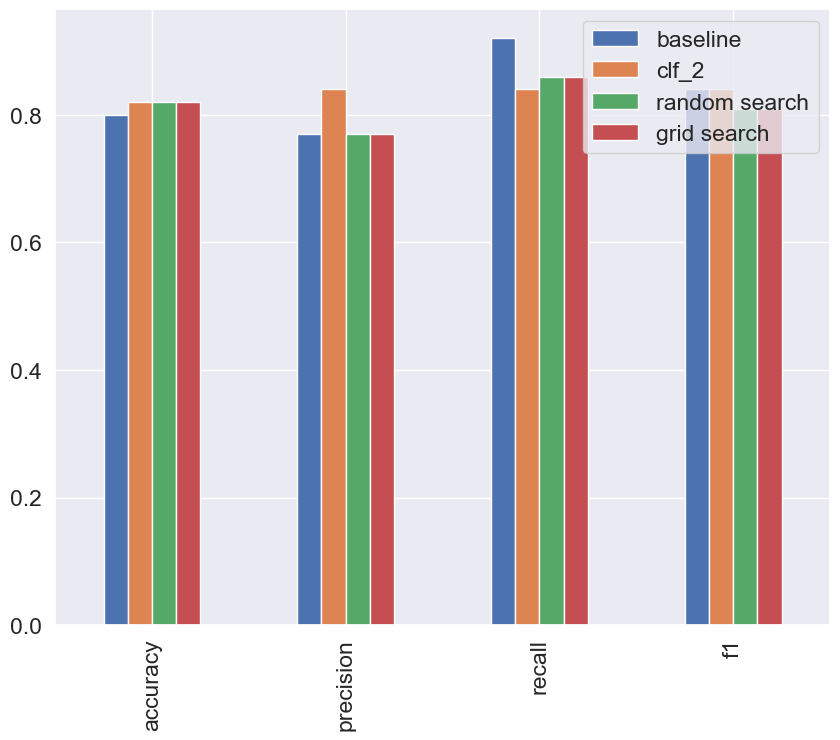

In [173]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'clf_2': clf_2_metrics,
                                'random search': rs_metrics,
                                'grid search': gs_metrics})


compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading trained ML models 

2 ways to save and load ml models:
1. Pickle module 
2. joblib Module 

**Pickle**

In [174]:
import pickle 

# Save an existing model to file 
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl','wb'))

In [175]:
# load a saved model 
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl','rb'))

In [177]:
# make some predictions 
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [181]:
from joblib import dump, load
# Save model to file 
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [182]:
# import a saved model 
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [183]:
# Make and evaluate joblib preds 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

if large model, may be more efficient to use joblib over pickle

# 7. Putting it all together !

In [186]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [187]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [189]:
# need to make sure all data is numerical for ML model 
# need to make sure there are no missing values 

In [190]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data 
2. Convert data to numbers 
3. Build a model on the data 

In [194]:
# Getting Data Ready
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np 
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset = ['Price'], inplace = True)

# Define diffrent features and transformer pipeline 
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy = 'constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', categorical_transformer, categorical_features),
        ('door', door_transformer, door_feature),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Creating a preprocessing and modelling pipeline 
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor())])

# Split data 
X = data.drop('Price', axis=1)
y = data.Price
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2)

# Fit and score the model 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

Its also possivle to use GridSearchCV or RandomizedSearchCV with the Pipeline

In [196]:
# Use GridSearchCV with our regression Pipeline 

pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    # 'model__max_features':['auto'],
    'model__min_samples_split':[2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 3, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [197]:
gs_model.score(X_test, y_test)

0.3370010330207851